In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [0]:
train_dataset = h5py.File('dataset/train_catvnoncat.h5','r')
test_dataset = h5py.File('dataset/test_catvnoncat.h5','r')

In [3]:
list(train_dataset.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [4]:
list(test_dataset.keys())

['list_classes', 'test_set_x', 'test_set_y']

In [5]:
np.array(train_dataset).shape

(3,)

three rows having above class names


In [0]:
train_x_orig = np.array(train_dataset['train_set_x'][:])
train_y_orig = np.array(train_dataset['train_set_y'][:])
test_x_orig = np.array(test_dataset['test_set_x'][:])
test_y_orig = np.array(test_dataset['test_set_y'][:])
classes = np.array(test_dataset['list_classes'][:])

In [7]:
print('training dataset have {} features'.format(len(train_x_orig)))
print('test dataset have {} '.format(len(test_x_orig)))
print('training dataset have {} labels'.format(len(train_y_orig)))
print('test dataset have {} labels'.format(len(test_x_orig)))

training dataset have 209 features
test dataset have 50 
training dataset have 209 labels
test dataset have 50 labels


In [8]:
test_y_orig.shape

(50,)

In [9]:
train_y_orig.shape

(209,)

In [0]:
test_y_orig = test_y_orig.reshape((1,test_y_orig.shape[0]))
train_y_orig = train_y_orig.reshape((1,train_y_orig.shape[0]))

In [11]:
test_y_orig

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]])

In [12]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

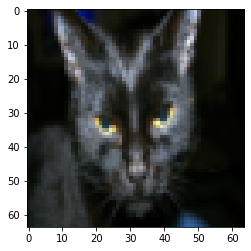

In [13]:
index = 25
plt.imshow(train_x_orig[index])

In [14]:
train_x_orig[index] #corresponding matrices for above image

array([[[15, 15,  5],
        [17, 17,  6],
        [17, 17,  7],
        ...,
        [ 1,  1,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[16, 16,  5],
        [18, 17,  6],
        [19, 18,  9],
        ...,
        [ 1,  1,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[16, 16,  6],
        [18, 17,  8],
        [21, 19,  9],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  0],
        [ 2,  2,  1]],

       ...,

       [[16, 21, 18],
        [22, 27, 24],
        [29, 35, 33],
        ...,
        [ 0,  1,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[16, 20, 16],
        [22, 29, 25],
        [29, 35, 32],
        ...,
        [ 1,  3,  1],
        [ 0,  1,  0],
        [ 0,  0,  0]],

       [[14, 19, 14],
        [21, 29, 25],
        [31, 37, 33],
        ...,
        [ 2,  4,  2],
        [ 1,  2,  1],
        [ 0,  0,  0]]], dtype=uint8)

In [15]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_x_orig.shape))
print ("train_set_y shape: " + str(train_y_orig.shape))
print ("test_set_x shape: " + str(test_x_orig.shape))
print ("test_set_y shape: " + str(test_y_orig.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [0]:
train_x_flatten = train_x_orig.reshape((train_x_orig.shape[0],-1)).T
test_x_flatten = test_x_orig.reshape((test_x_orig.shape[0],-1)).T

In [17]:
train_x_flatten.shape[1]

209

In [18]:
test_x_flatten.shape[1]

50

In [0]:
train_x_orig = train_x_flatten/255.
test_x_orig = test_x_flatten/255.

In [0]:
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s

In [0]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0
    
    return w, b

In [0]:
def propagate(w, b, X, Y):
    
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = -1./m * np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                               # compute cost
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1./m *np.dot(X,(A-Y).T)
    db = 1./m* np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [0]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
             Y_prediction[0, i] = 0
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [26]:
d = model(train_x_orig, train_y_orig, test_x_orig, test_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


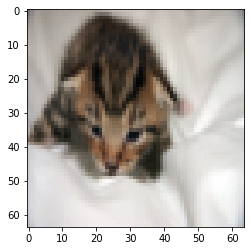

In [27]:
index = 1
plt.imshow(test_x_orig[:,index].reshape((num_px, num_px, 3)))


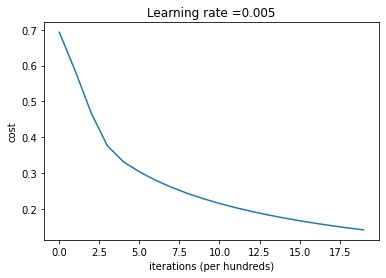

In [28]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



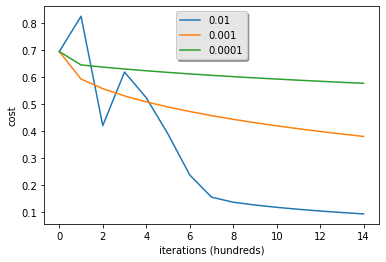

In [29]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_x_orig, train_y_orig, test_x_orig, test_y_orig, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Test with your own image

In [30]:
!pip install Pillow
!pip install scipy==1.1.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


y = 0.0, your algorithm predicts a "non-cat" picture.


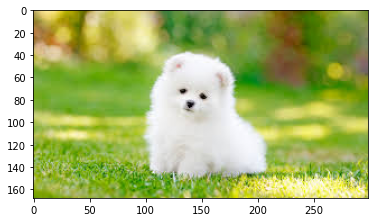

In [31]:
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")